In [1]:
import numpy as np
import os,sys



sys.path.append('../../../RL_lib/Agents/PPO')
sys.path.append('../../../RL_lib/Utils')
sys.path.append('../..')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/MarsLanding_3dof_v1/Run/Run_1km


In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

3-dof dynamics model
lander model apf
dvec vc 3
queue fixed
Flat Constraint


<IPython.core.display.Javascript object>


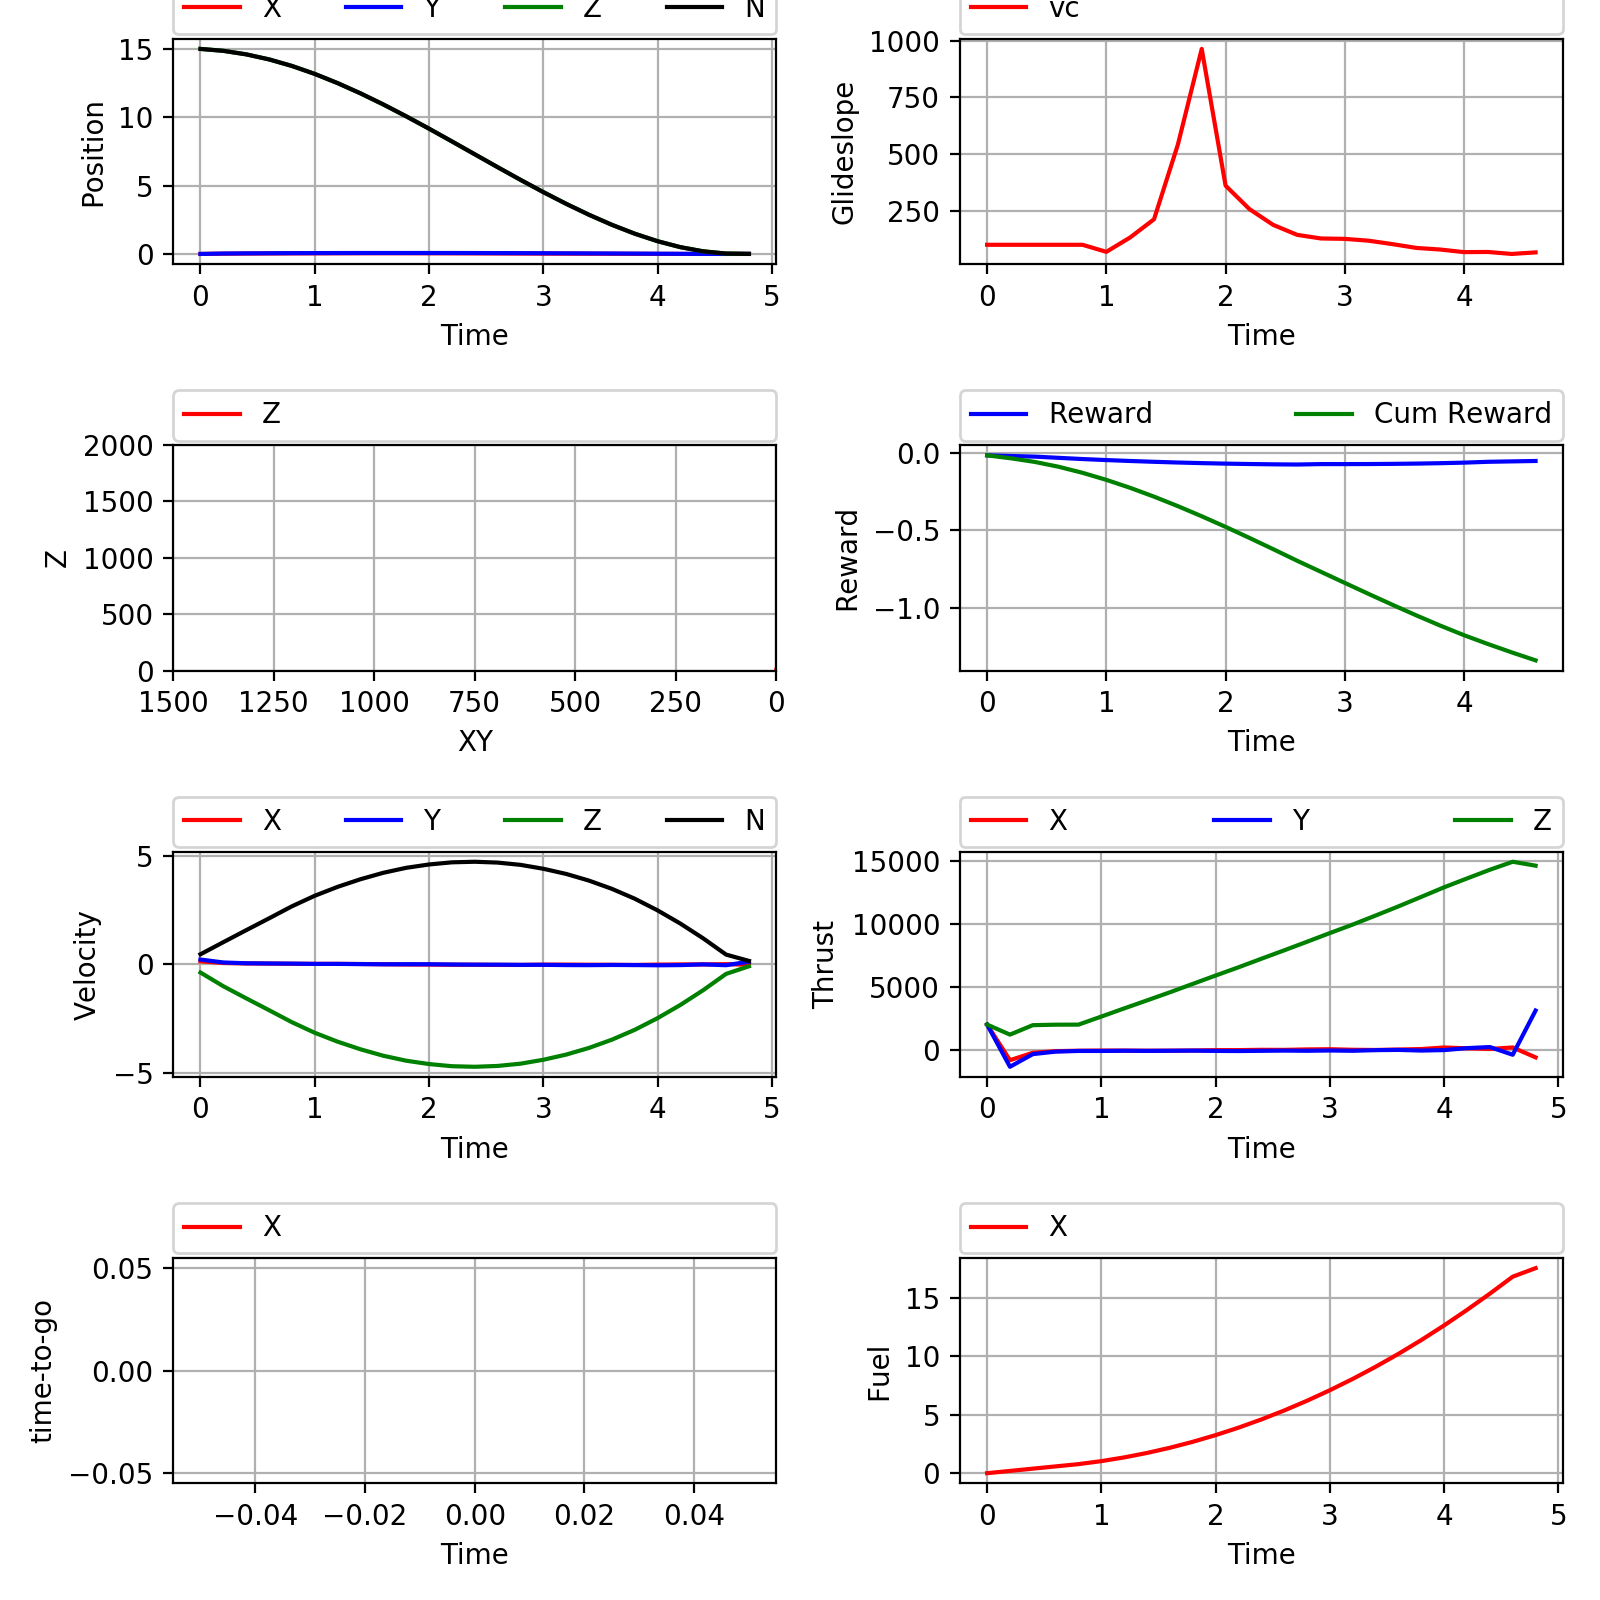

<IPython.core.display.Javascript object>


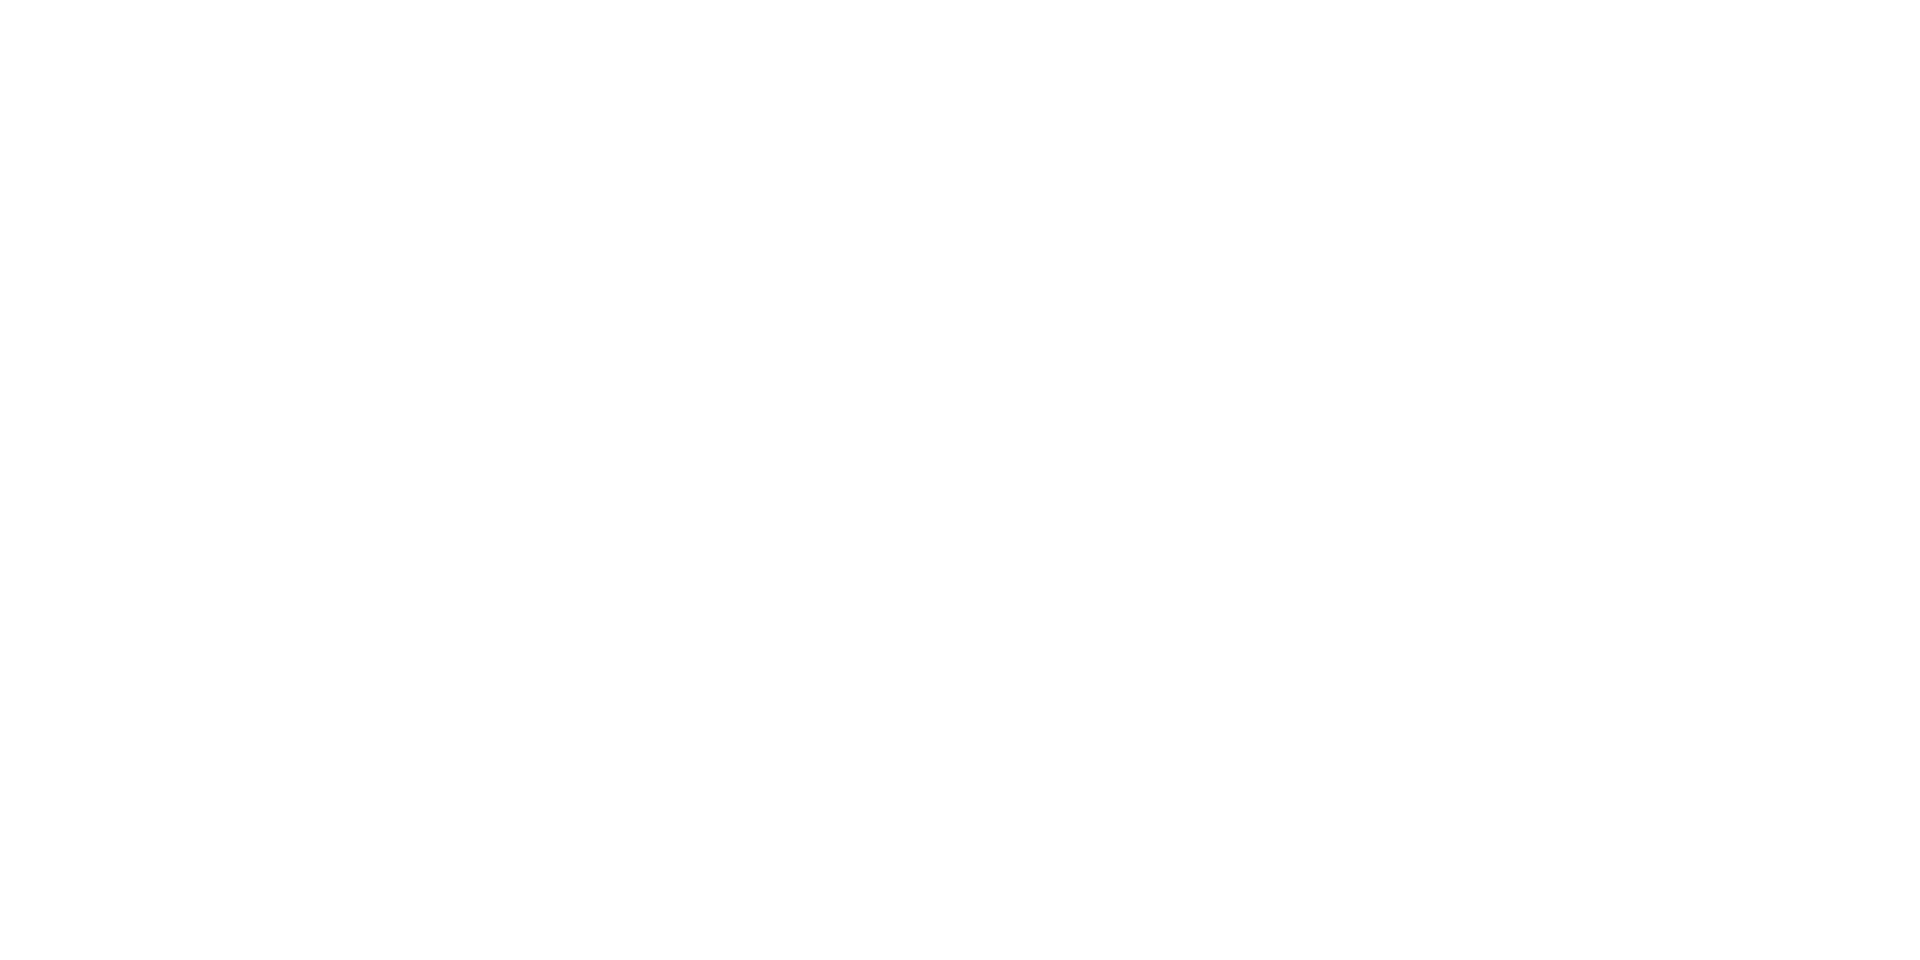

<IPython.core.display.Javascript object>


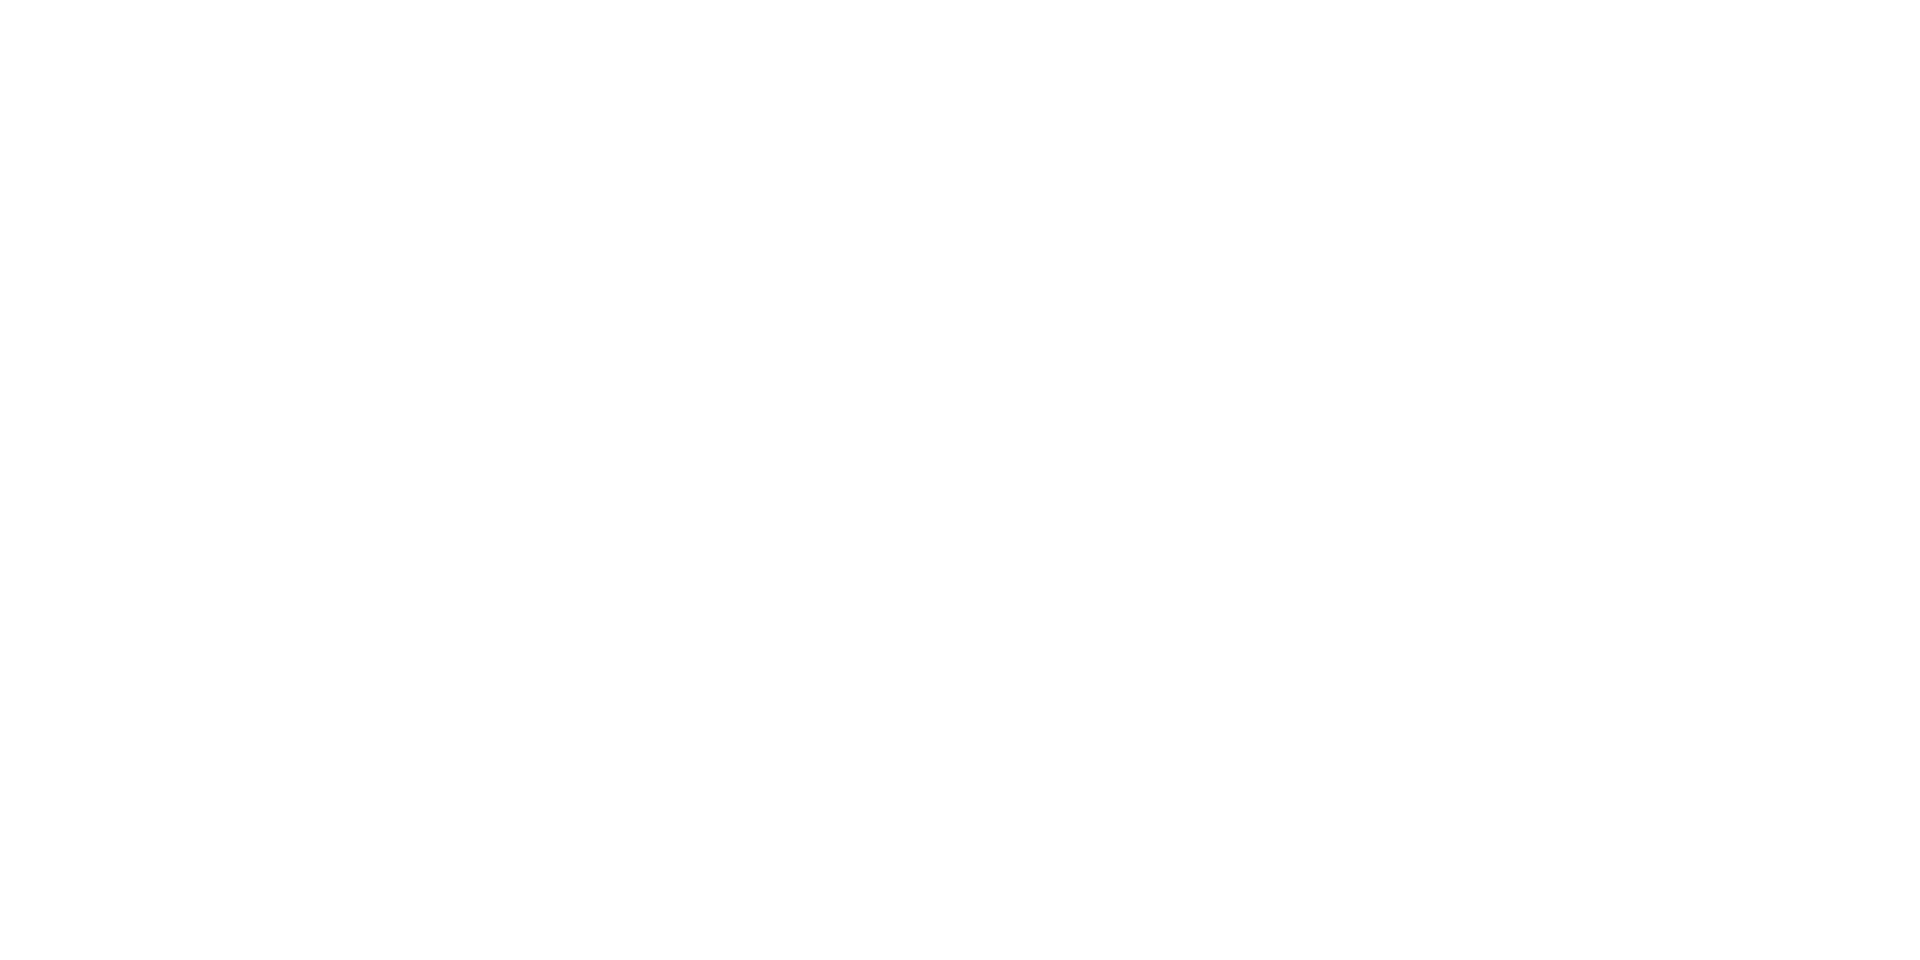

<IPython.core.display.Javascript object>


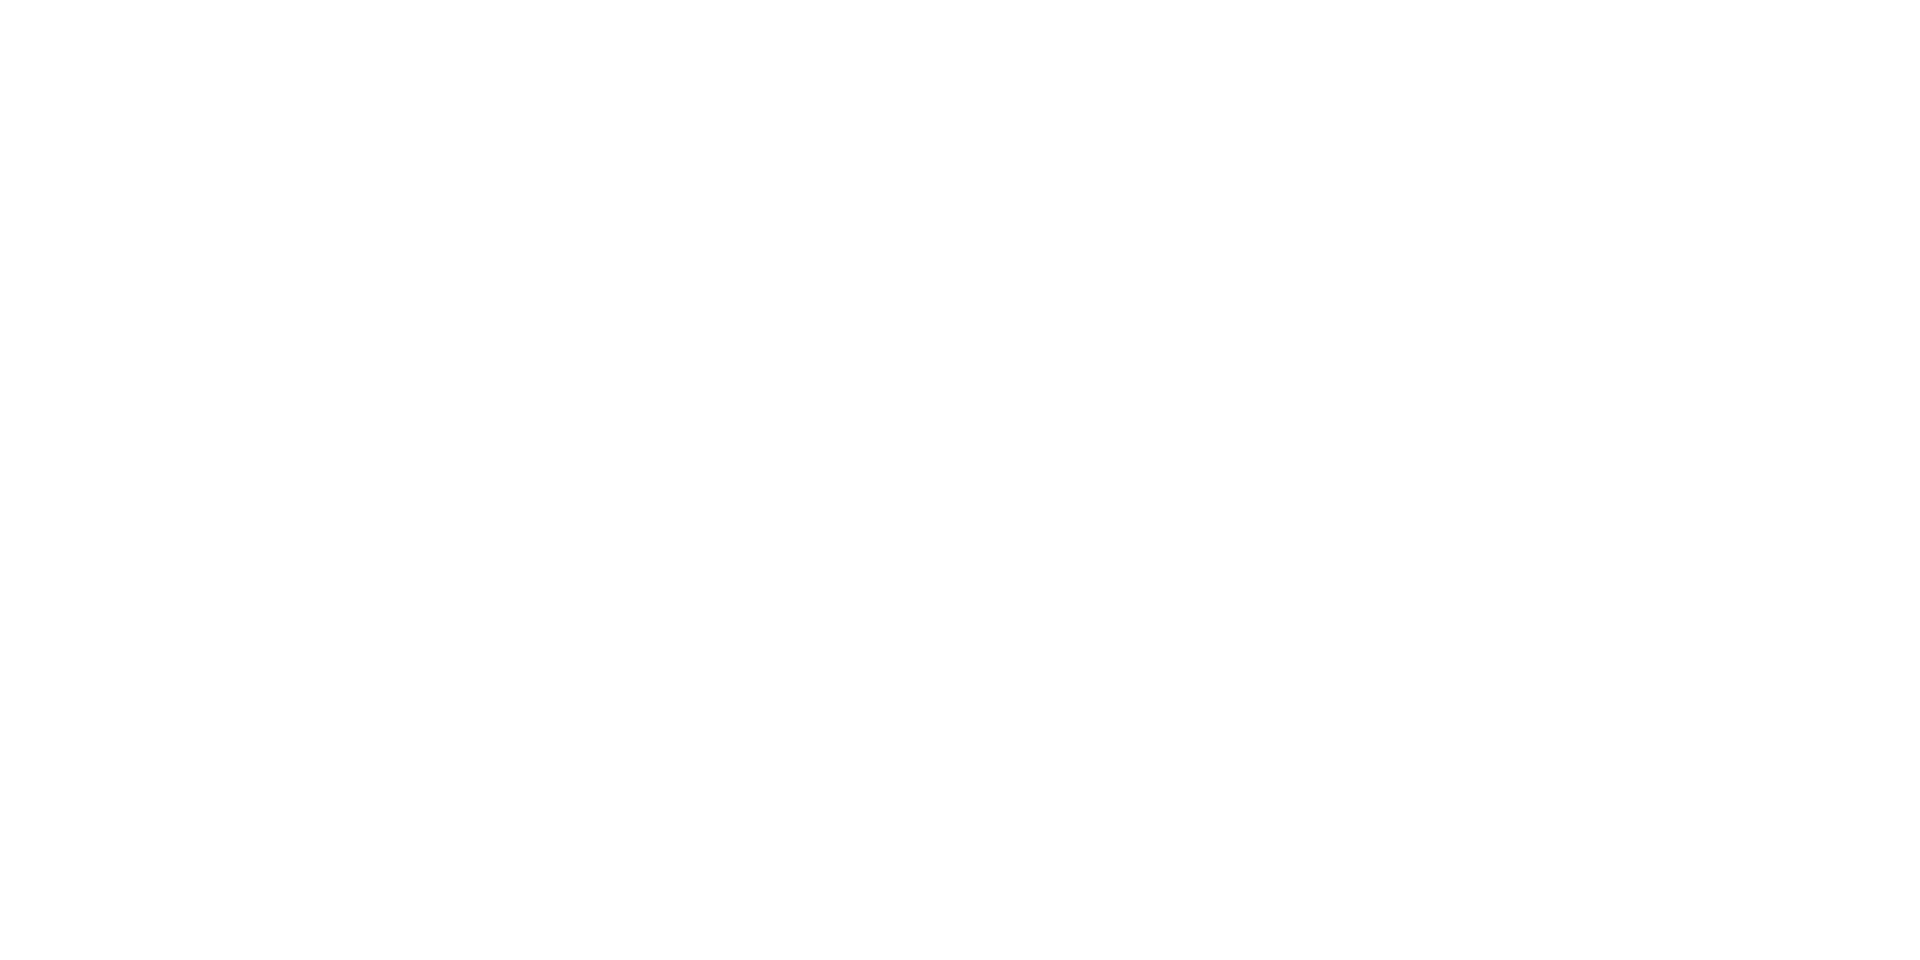

<IPython.core.display.Javascript object>


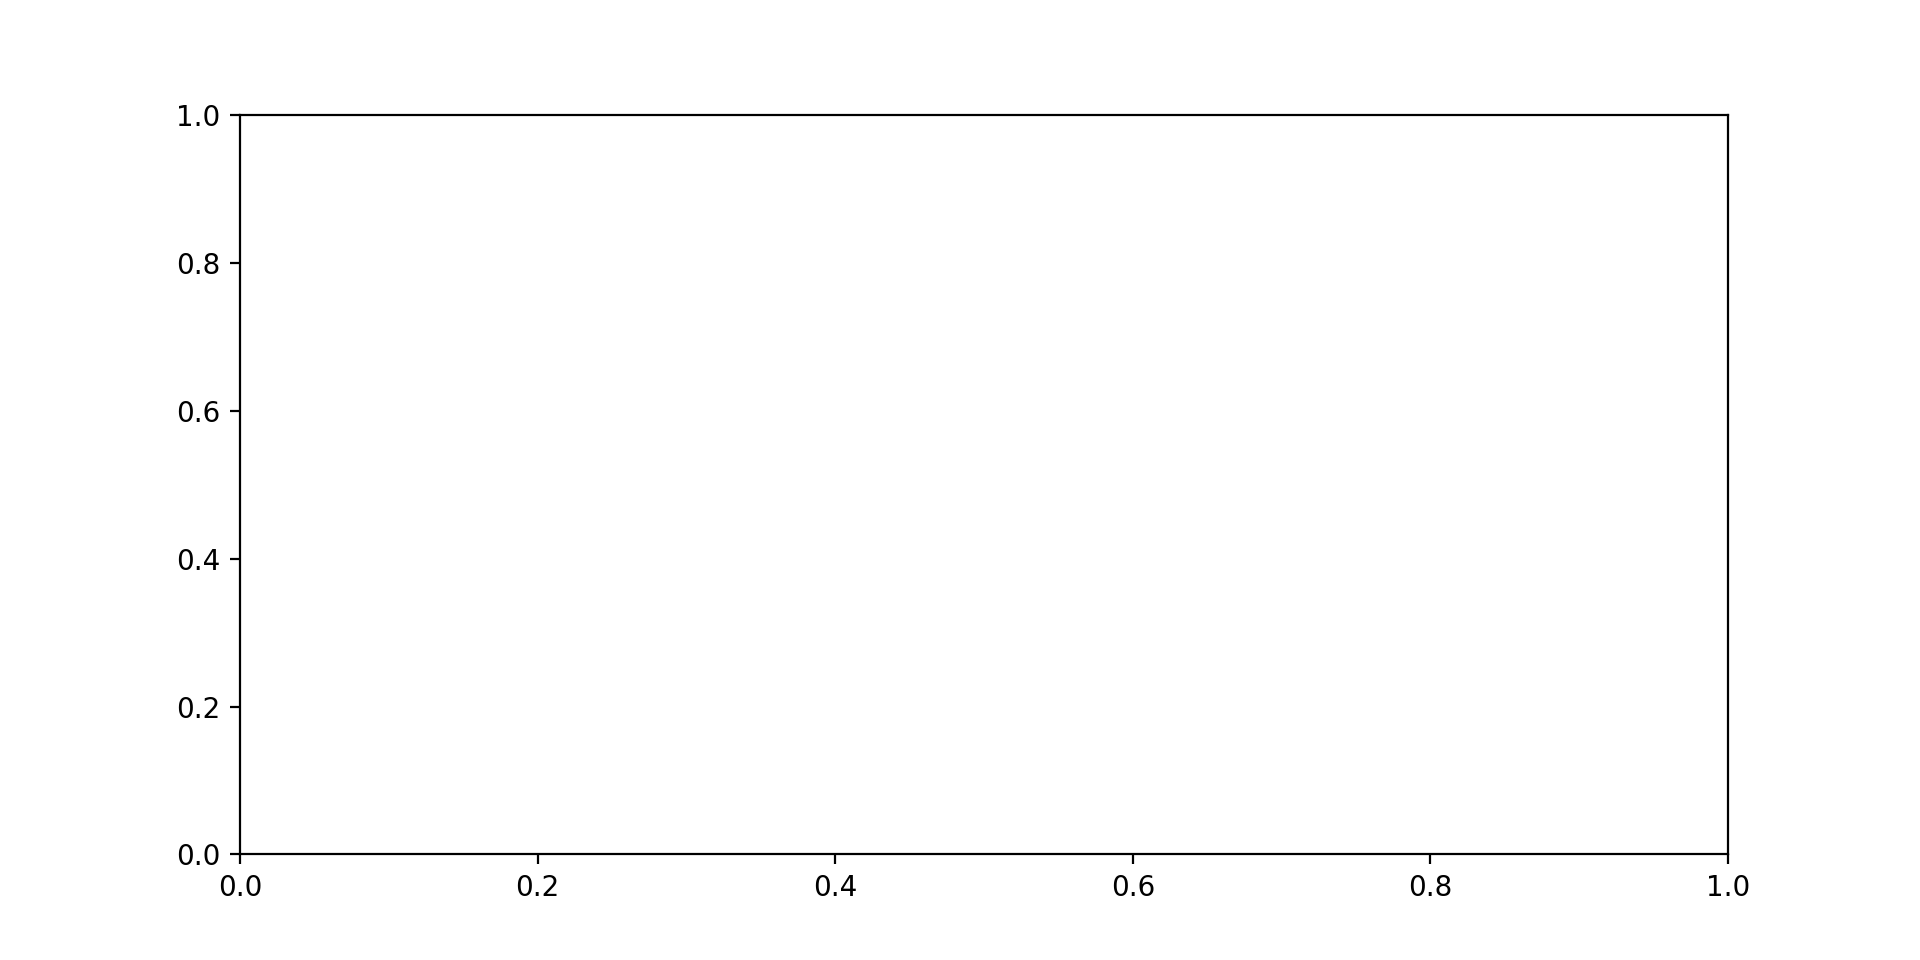

lander env new
Landing_icgen:
    downrange                   :  (0, 0, -0.5, 0.5)
    crossrange                  :  (0, 0, -0.5, 0.5)
    altitude                    :  (15, 15, -0.5, 0.5)
    adjust_apf_v0               :  True
24 0.003599592218941258 0.1552703192118199


In [8]:
from env import Env
from dynamics_model import Dynamics_model
from reward import Reward
from lander_model import Lander_model
from flat_constraint import Flat_constraint

from glideslope_constraint import Glideslope_constraint
from ic_gen import Landing_icgen


from drdv_agent import DRDV_agent
from utils import Mapminmax,Logger

logger = Logger()

dynamics_model = Dynamics_model(h=0.05)

lander_model = Lander_model(use_trajectory_list=True)
lander_model.get_state_agent = lander_model.get_state_agent8
#lander_model.max_thrust=55000
reward_object = Reward()
glideslope_constraint = Glideslope_constraint(gs_limit=0.0)
#shape_constraint = Parabaloid_constraint(altitude=500,debug=False)
shape_constraint = Flat_constraint()
env = Env(lander_model,dynamics_model,logger,
          reward_object=reward_object,
          glideslope_constraint=glideslope_constraint,
          shape_constraint=shape_constraint,
          tf_limit=200.0,print_every=10,
          scale_agent_action=False)


#env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.0,0.0),noise_u=100,noise_sd=100, #u=1000 breaks
#                          downrange = (0,0 , -1, 1), 
#                           crossrange = (-0,0 , -1,1),  
#                          altitude = (15,15,-1, 1))
env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.0,0.0),noise_u=100,noise_sd=100, #u=1000 breaks
                          downrange = (0,0 , -0.5, 0.5), 
                           crossrange = (-0,0 , -0.5,0.5),  
                           altitude = (15,15,-0.5, 0.5))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()


In [9]:

pos,vel,traj=agent.test_batch(n=1000)

24 0.0024647927390742614 0.4684235470854166
24 0.009700808094058128 0.1943869867951486
25 0.0021926954502948966 0.13136464469061795
27 0.009358967716751229 0.19680404422758474
23 0.02103522323324109 0.38175194057437045
25 0.014644129881549022 0.27512624281506415
25 0.00032749993563378527 0.1611816304566071
26 0.0013679018629638615 0.10656930601685236
24 0.0028013278383987204 0.3266347023334353
26 0.0059849152251297685 0.42389941091088035
28 0.022777298206061204 0.49497662485926985
25 0.0029746314802123175 0.06707383742339097
25 0.007072244620041812 0.20152037989470561
25 0.031005237990959427 0.858054280598531
25 0.004544004894687677 0.1365532935375024
26 0.019890444377118618 0.6673082972696601
23 0.01667742043783447 0.26020326322451093
29 0.019611560013851306 0.3476864965978103
25 0.0011690374665459466 0.13778431023652862
25 0.0001349852733217931 0.19881642382204104
25 0.0021988838619909318 0.40094896258039037
26 0.01014994206222663 0.4415880333546236
24 0.014512485215307286 0.35003542

25 0.011635861755946263 0.3356300936424832
25 0.008637147729700692 0.2570600634961734
26 0.011088310900021322 0.818458843851513
29 0.015493039065701025 0.2833095405174633
25 0.006416178815303194 0.5968644735338993
26 0.012783808953666022 0.4364935264099879
26 0.0009791443616626629 0.19822294933308768
24 0.01101297605176596 0.1550650416795671
26 0.0027301788556987777 0.4074511703757611
25 0.001752992097809715 0.12616563467371464
26 0.0008671990049941993 0.386506158918006
26 0.006533665032090747 0.7840854247516617
29 0.004915161071299668 0.13927079415210922
23 0.013611841205115617 0.649440381095565
23 0.002069123353237515 0.542548269780765
24 0.004919292041092303 0.48762559027822827
23 0.013714151128597713 0.3826407438810749
28 0.0033060930413320146 0.15922698293233267
26 0.0011631499246126476 0.19654823858580167
24 0.0035617938692987456 0.07121794226589248
29 0.011121478786074007 0.39256684490036703
23 0.028640170742418647 0.5225001287283616
24 0.0037225509360240662 0.10732225146824172


25 0.007126014667088382 0.058663628822128513
24 0.00970101565032944 0.39240356006491484
25 0.00105866260331954 0.04374900053997933
26 0.0005369303155471999 0.39628409982137225
24 0.004171699094930508 0.09173182271587449
26 0.005053417243694741 0.132074965257932
25 0.014464142056336435 0.4660002948953138
24 0.010304183524725556 0.26320224853244006
24 0.007577726058210792 0.14140946749574249
25 0.0009369771291616921 0.049851175731762065
25 0.002280500598605862 0.1194894716141397
28 0.009785581348745562 0.3870547338734154
25 0.010761934216467131 0.1366311268676351
26 0.022105743154667252 0.6777653385863074
27 0.009354345091922645 0.2555481503146393
26 0.01162261124614739 0.44242498744164105
24 0.0010709260882481076 0.02732136255291937
24 0.004964837474059168 0.553065568880185
25 0.009504068237247202 0.267977012753192
27 0.008377903061868948 0.4546507607033037
25 0.0010083584222221895 0.030682512640245928
27 0.006236693903722561 0.799624560830656
24 0.006748402297225113 0.1400829262328413


24 0.010535103910560254 0.17293704643874425
25 0.010479580513644282 0.4378701796671105
28 0.00576644572956158 0.4108285785872771
25 0.016754596367884234 0.48095114874569866
27 0.015475372333417307 0.47268563032738864
23 0.015066479819637792 0.5212081721601659
25 0.004285049483127936 0.12959772594168661
23 0.001543748829611392 0.4943222445234366
26 0.013117992076684083 0.4429975704557295
26 0.002609990740250113 0.5911503040799887
24 0.013218863694832488 0.17774122649399693
25 0.002800766271366555 0.13702209744530122
28 0.009247713786149372 0.337114805613749
24 0.000947677618821537 0.41126702128449
26 0.0033072855265799442 0.600760437018718
26 0.034716603417869044 0.870296011048333
25 0.001090537556527238 0.1329121441158182
24 0.0011862618600130702 0.6259705945416627
27 0.011013261233471022 0.19310480104066075
29 0.009075576082679787 0.21950450775349342
28 0.0068935604575690364 0.5241577378032707
26 0.000726745332397435 0.38935404711225935
24 0.0021399793503618873 0.5290294564979625
25 0

28 0.023954699509859567 0.5129469516480157
27 0.011719872696398766 0.4364319140623855
26 0.003988483342223375 0.41133049499295576
24 0.012121531220212959 0.19518058868680238
28 0.011763465119629881 0.39304016980126566
25 0.002381065020167848 0.13752060313987854
24 0.004995259864428004 0.14449944753527344
25 0.0018363004392923199 0.0718711211560789
25 0.006594222026183357 0.12069243950625003
25 0.010263983547680917 0.2905151128849668
26 0.005090278287203211 0.1586079912533052
26 0.010852985236052805 0.4490338217183742
25 0.006154722642944015 0.12741525117421446
27 0.024154136696282198 0.5082145207185015
24 0.013884118700503847 0.3236909038432438
28 0.013615422145331109 0.22462771019490904
23 0.0035742215850057602 0.4998103311237513
25 0.0037107261035828638 0.07320330828382328
26 0.006498525488616066 0.4186185811980929
25 0.0003092049665927582 0.19281176219900686
26 0.009325310608512143 0.43152803382179383
26 0.01863169555556645 0.659894039985057
24 0.0026612144420524466 0.13771141626434

26 0.026586563634802253 0.6954876576707412
25 0.00010436766511738607 0.19187773233567001
25 0.0015383676824978463 0.1493034378004904
29 0.004417940110165913 0.40615783502126596
24 0.0017292236923413125 0.10354144547253359
25 0.0021165957977334732 0.148689857870253
25 0.0003648388737543109 0.3828870235437567
28 0.023093430786674227 0.37409159209957804
24 0.010745110019439078 0.26175963816079295
25 0.0011675548921458768 0.13368291675947966
24 0.000865412481576077 0.1968626367660764
25 0.004537377701937288 0.09311828914067126
28 0.025089612228205965 0.8599817986275963
25 0.003359679158373884 0.1664822626172834
28 0.005414131225971319 0.4045590435074162
26 0.005765201328407712 0.42365400492054
27 0.001586162483088652 0.5478435702077634
24 0.001441452008216043 0.5802000575605617
25 0.004738402592351677 0.1518953613663844
24 0.014319776693145872 0.2758961148722194
25 0.0035075057207663227 0.09074084507278593
26 0.008277521284271883 0.20336672131527175
24 0.003805532571146957 0.05961845283324

In [10]:
tl = lander_model.trajectory_list
print(len(tl))
pos = []
vel = []
fuel = []
gs = []
steps = []
for t in tl:
    pos.append(np.linalg.norm(t['position'][-1]))
    vel.append(np.linalg.norm(t['velocity'][-1]))
    fuel.append(np.linalg.norm(t['fuel'][-1]))
    gs.append(np.min(t['glideslope']))
    steps.append(len(t['position']))
print(np.max(pos), np.max(vel))
wc = np.argmax(pos)
print ('1: ',tl[wc]['position'][0])
print ('2: ',tl[wc]['velocity'][0])
print ('3: ',tl[wc]['position'][-1])
print ('4: ',tl[wc]['velocity'][-1])
print('mean fuel: ',np.mean(fuel))
print('std fuel: ',np.std(fuel))
print('min fuel: ',np.min(fuel))
print('max fuel: ',np.max(fuel))
print('min GS: ',np.min(gs))
print('mean steps: ',np.mean(steps))
print('max steps: ',np.max(steps))

1001
0.03772131690616273 0.9049482973690572
1:  [ 0.  0. 15.]
2:  [-0.35031585  0.36001323  0.41452963]
3:  [-0.00777384  0.03284551 -0.01684155]
4:  [-0.10323881  0.41701607 -0.29916612]
mean fuel:  18.22039945479227
std fuel:  1.1609866064904013
min fuel:  16.963245708227078
max fuel:  23.502609885783386
min GS:  7.6016853085076
mean steps:  26.315684315684315
max steps:  30


In [11]:
foo = tl

1001
998


<IPython.core.display.Javascript object>


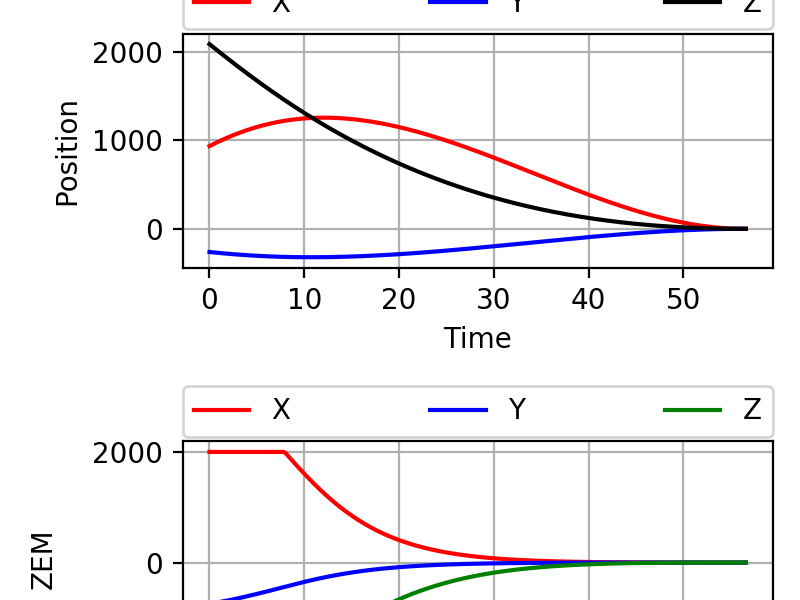

In [24]:
import env_utils as envu
npos = np.linalg.norm(pos,axis=1)
wc = np.argmax(npos)
envu.render_traj(traj[wc])

In [10]:
np.random.uniform(low=3,high=3)

3.0

Landing_icgen:
    downrange                   :  (1500, 1500, -70, -70)
    crossrange                  :  (-500, -500, -30, -30)
    altitude                    :  (2100, 2100, -90, -90)


<IPython.core.display.Javascript object>


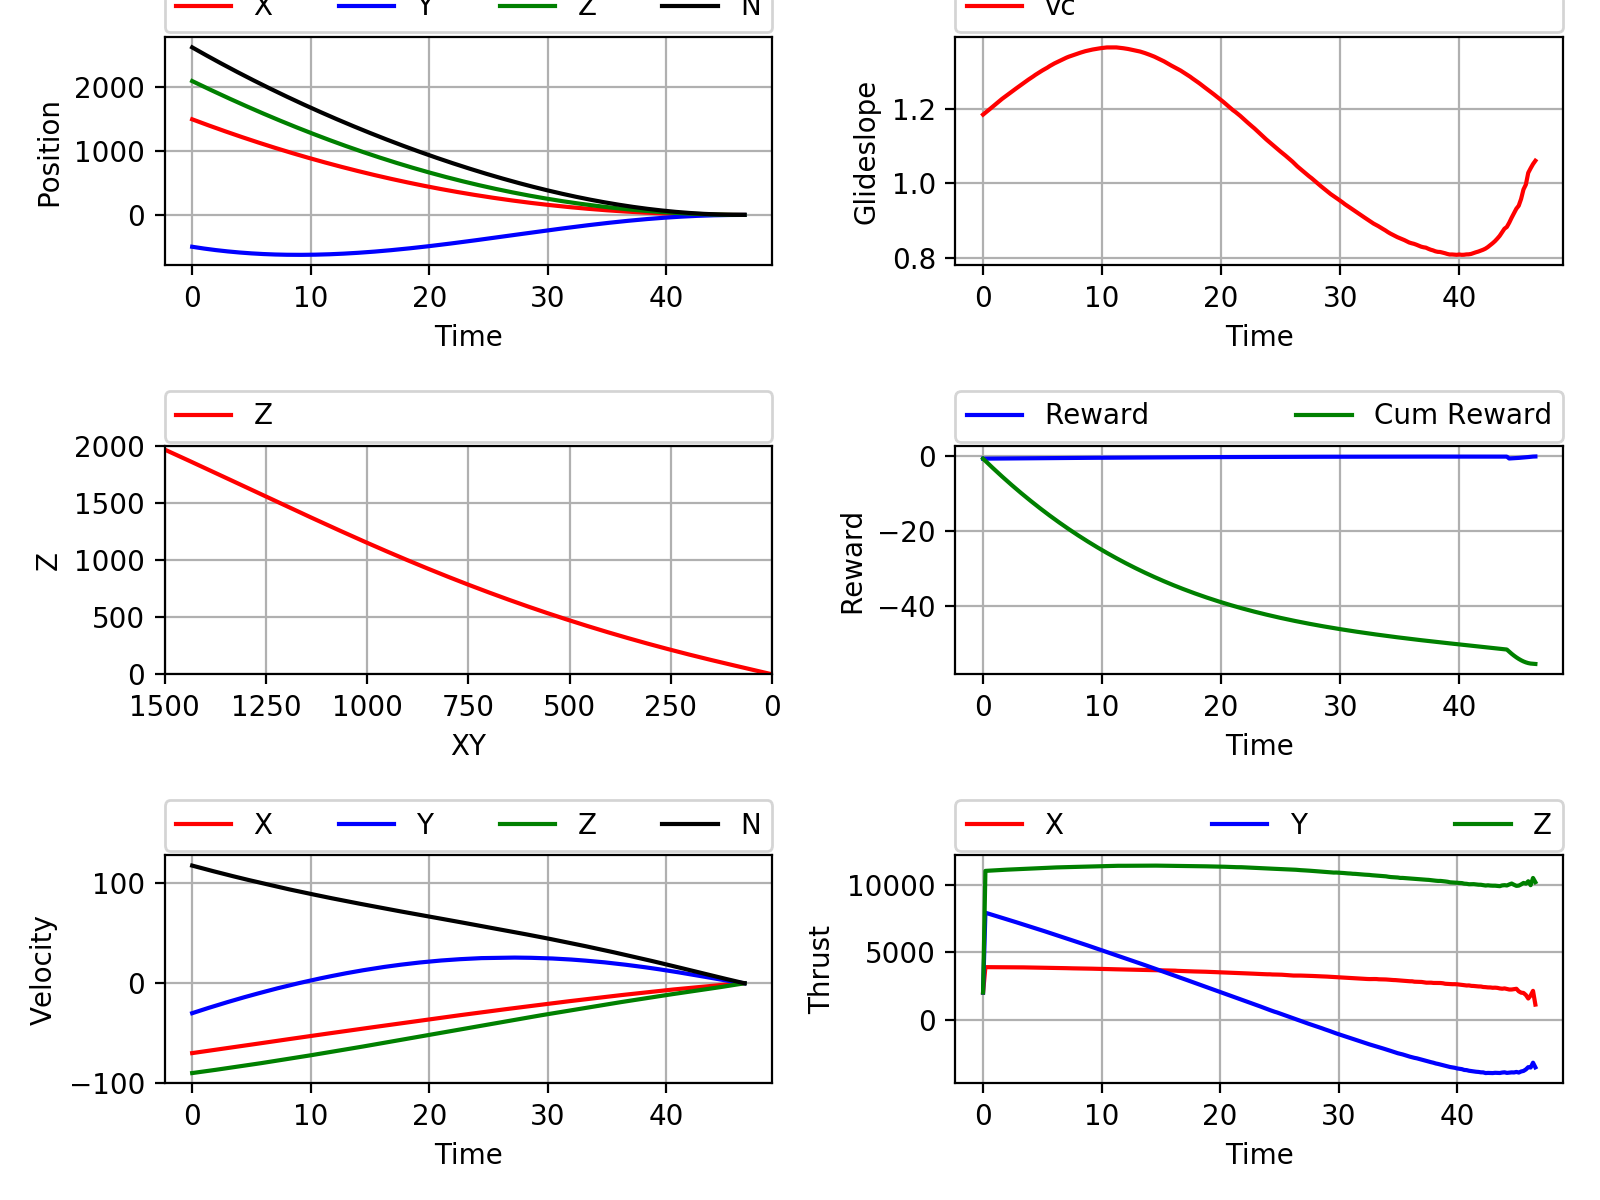

233 0.006176921753766272 0.08812700162431006


In [6]:
env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=50,noise_sd=200,
                          downrange = (1500,1500 , -70, -70), 
                           crossrange = (-500,-500 , -30,-30),  
                           altitude = (2100,2100,-90,-90))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()

<IPython.core.display.Javascript object>


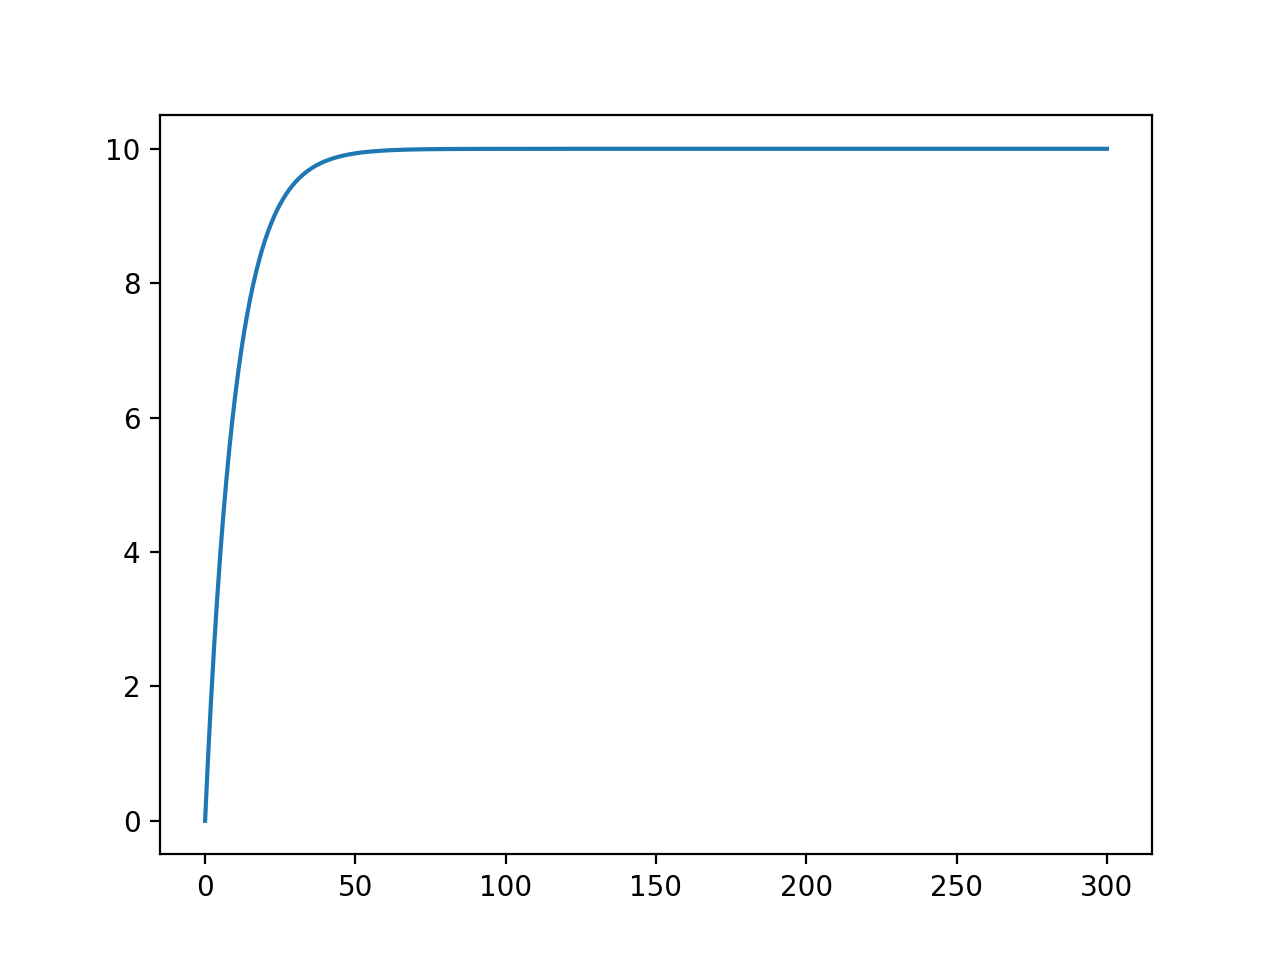

In [32]:
import matplotlib.pyplot as plt
xy = np.linspace(0,300,300)
tau = 10
atarg = 10*(1-np.exp(-xy/tau))
plt.figure()
plt.plot(xy,atarg)
plt.show()